In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# Data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 

In [25]:
print(X.shape)
print(y.shape)

print(X)
print(y)

(569, 30)
(569, 1)
     radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0      17.99     10.38      122.80  1001.0      0.11840       0.27760   
1      20.57     17.77      132.90  1326.0      0.08474       0.07864   
2      19.69     21.25      130.00  1203.0      0.10960       0.15990   
3      11.42     20.38       77.58   386.1      0.14250       0.28390   
4      20.29     14.34      135.10  1297.0      0.10030       0.13280   
..       ...       ...         ...     ...          ...           ...   
564    21.56     22.39      142.00  1479.0      0.11100       0.11590   
565    20.13     28.25      131.20  1261.0      0.09780       0.10340   
566    16.60     28.08      108.30   858.1      0.08455       0.10230   
567    20.60     29.33      140.10  1265.0      0.11780       0.27700   
568     7.76     24.54       47.92   181.0      0.05263       0.04362   

     concavity1  concave_points1  symmetry1  fractal_dimension1  ...  radius3  \
0       0.30010        

In [26]:
# Checking for missing values
X.isnull().sum()

radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
dtype: int64

     Diagnosis
0            1
1            1
2            1
3            1
4            1
..         ...
564          1
565          1
566          1
567          1
568          0

[569 rows x 1 columns]
Diagnosis
0    0.627417
1    0.372583
Name: proportion, dtype: float64


C:\Users\mm243067m\AppData\Local\Temp\ipykernel_14900\1199548407.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Diagnosis']=y['Diagnosis'].replace({'M':1, 'B':0})


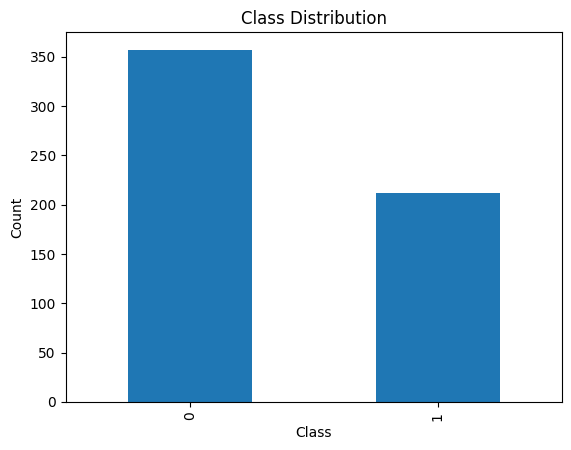

In [35]:
# Coding y such that M is 1 and B is 0
y['Diagnosis']=y['Diagnosis'].replace({'M':1, 'B':0})

print(y)

# Checking if classes are balanced
count=y['Diagnosis'].value_counts()
count.plot(kind='bar')
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")

print(y['Diagnosis'].value_counts(normalize=True))



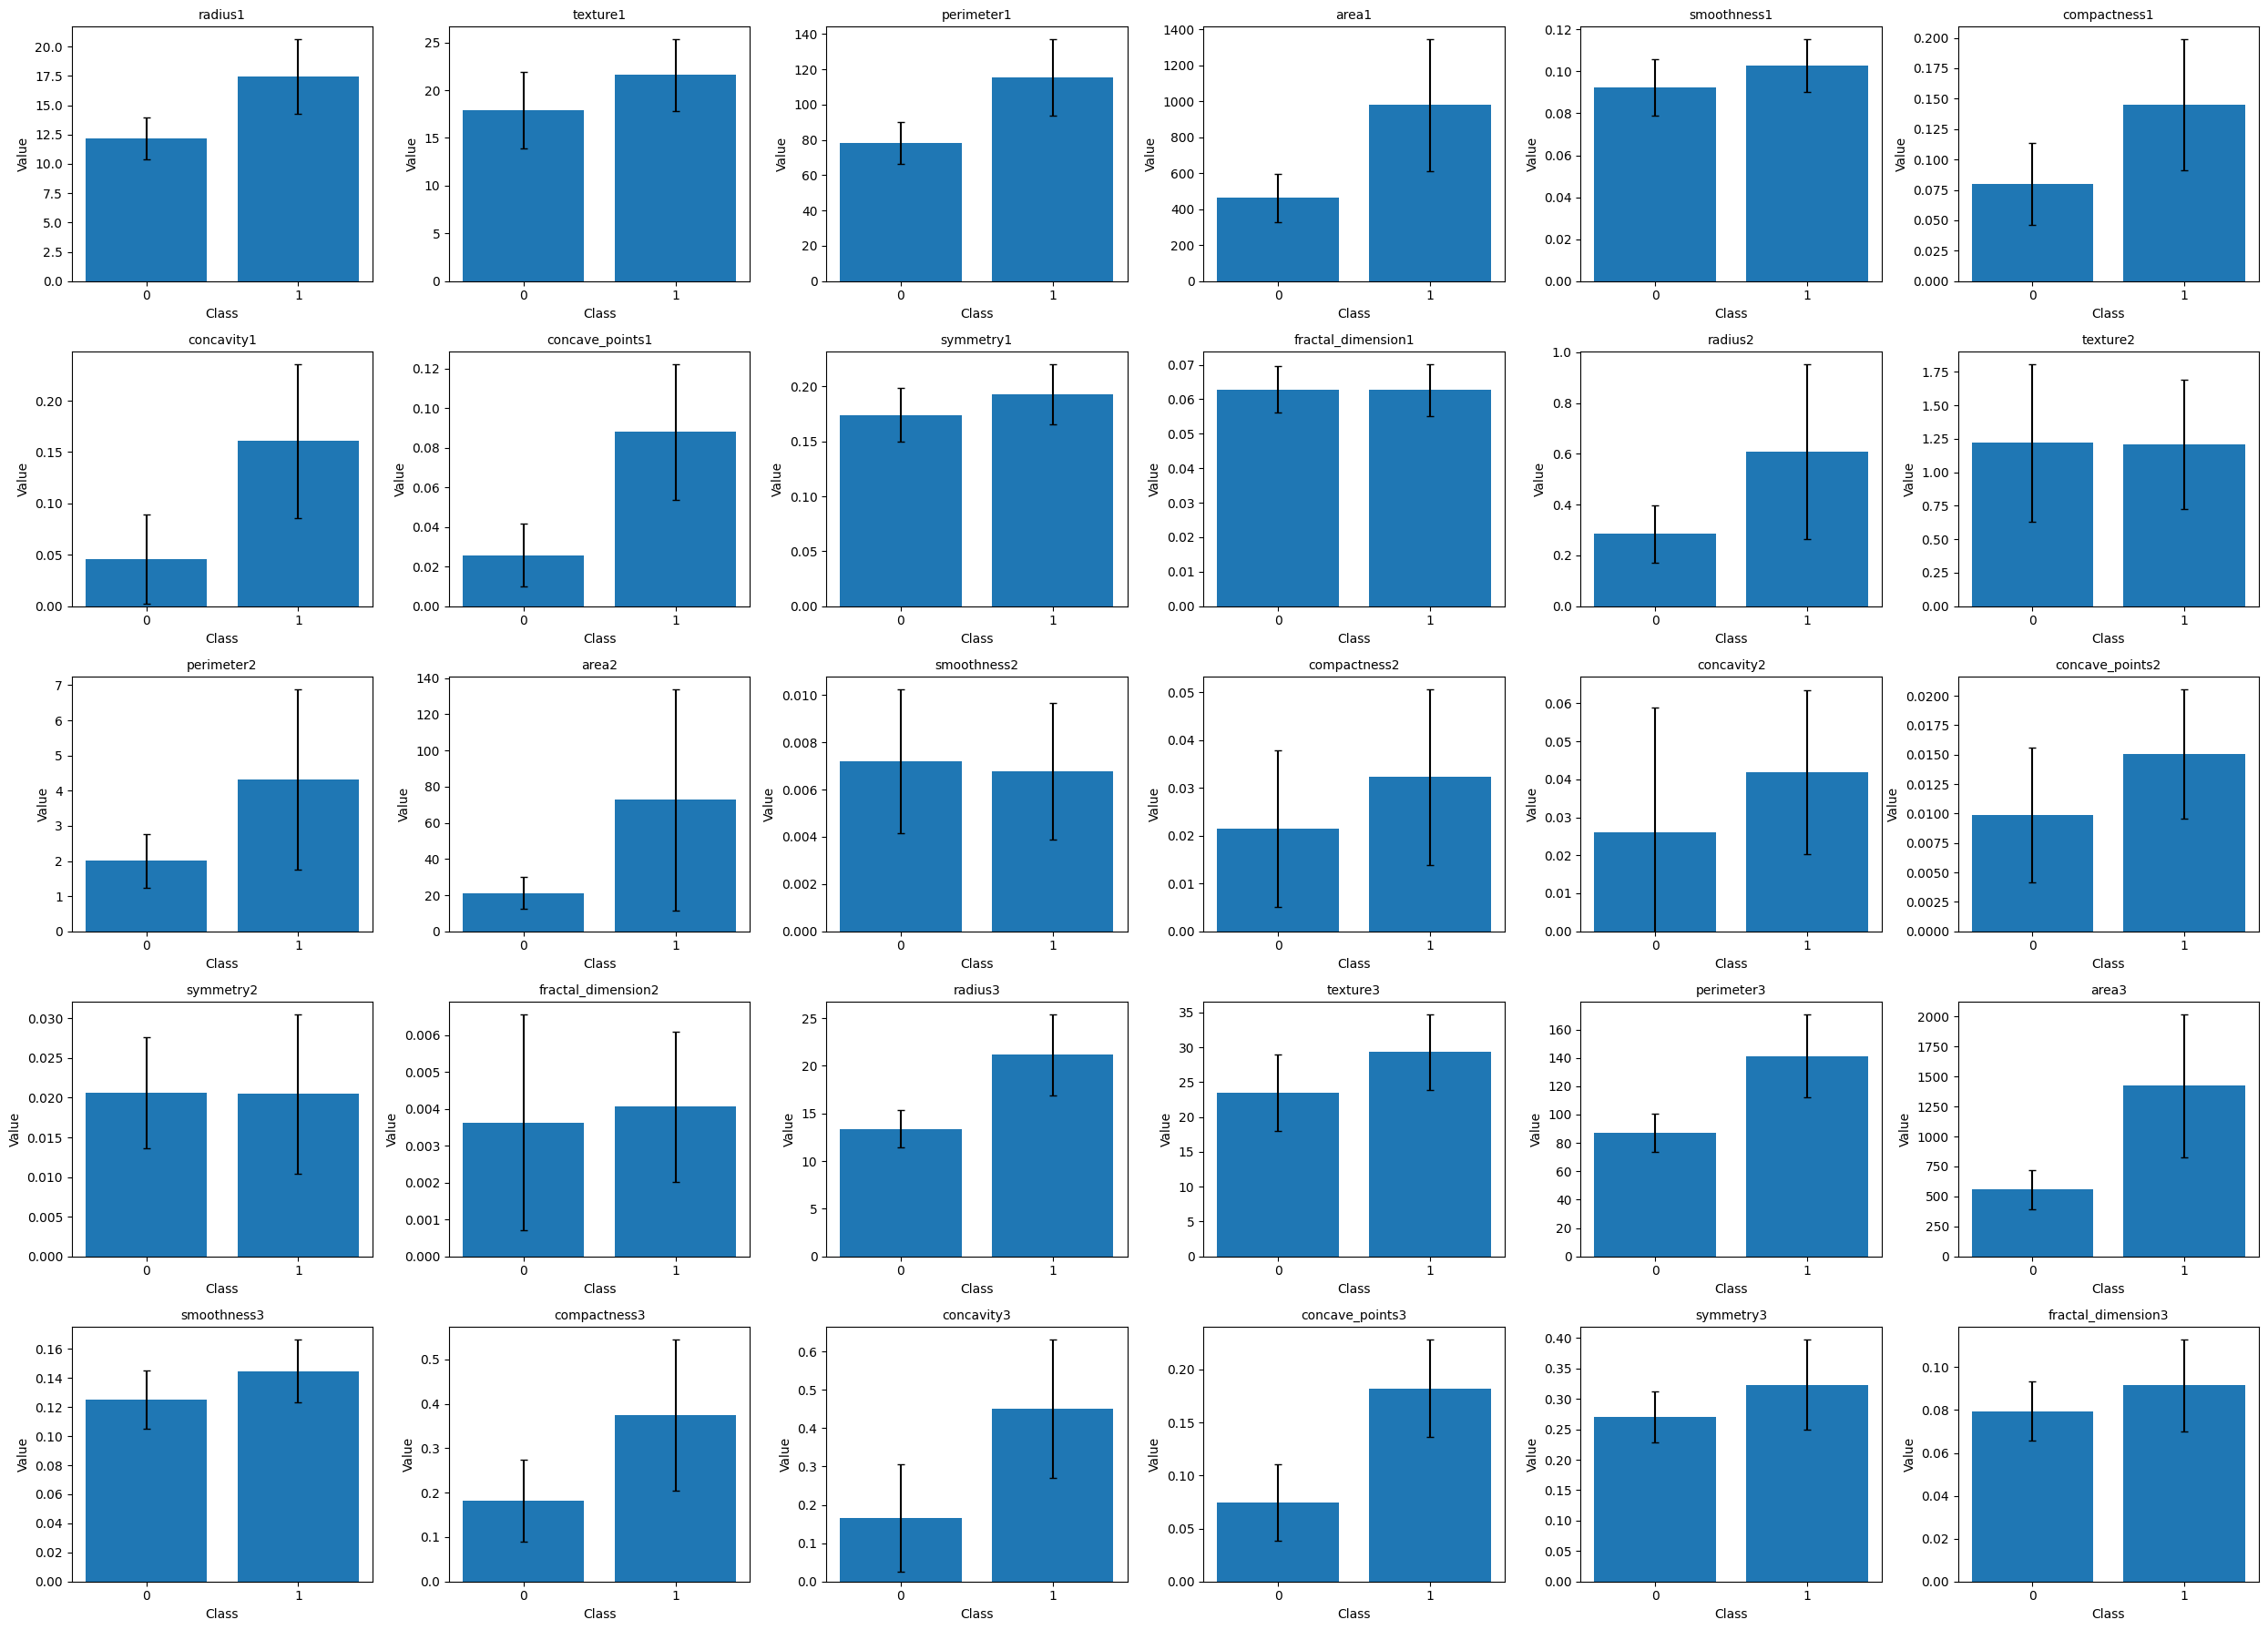

In [53]:
# Bar-plot for each feature

means = X.groupby(y['Diagnosis']).mean()
stds = X.groupby(y['Diagnosis']).std()

n_features = X.shape[1]

n_rows, n_cols = 5, 6
fig, axes = plt.subplots(n_rows, n_cols, figsize=(25, 18))
axes = axes.flatten()

for i, col in enumerate(X.columns):
    axes[i].bar(
        x=[0,1],
        height=means[col],
        yerr=stds[col],
        capsize=3,
        tick_label=["0", "1"]
    )
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel("Class")
    axes[i].set_ylabel("Value")
    axes[i].set_ylim(bottom=0)  

plt.tight_layout()

